## This project explores different image enhancement and 3D imaging libraries in python for thermal images captured in CADIPT by the author
### Author: Pantea Tavakolian, Ph.D.
CADIPT Lab: https://cadipt.mie.utoronto.ca/
We collected thermal images from a thigh of a mouse that has tumor by Enhanced Truncated-correlation Photothermal Coherence Tomography. I applyed different morphological processing methods and I was able to highlight the tumor and its surrounding vasculature around it. Then I mad a slice by slice 3D image of it.

In [21]:
# The code was removed by Watson Studio for sharing.

--2020-03-12 16:55:28--  https://www.dropbox.com/s/yw8x23x1v4i0fdh/Rec--000098_PhaseAll%20%283%29.dat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yw8x23x1v4i0fdh/Rec--000098_PhaseAll%20%283%29.dat [following]
--2020-03-12 16:55:28--  https://www.dropbox.com/s/raw/yw8x23x1v4i0fdh/Rec--000098_PhaseAll%20%283%29.dat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0ef2ddfbed6bdd33bf46a0008.dl.dropboxusercontent.com/cd/0/inline/Azw4pS4numLAJQ-y9w753b3KG1IoqB45i_Ukd4LHtR69uGp-6M3t_9sEW_ltHUfSBjO_lzHCMberBu1YLOX2osFDWIbSweWYuQQTqSS2puodJeJ7gbUdKtbHzYuWGyoRoFA/file# [following]
--2020-03-12 16:55:28--  https://ucd0ef2ddfbed6bdd33bf46a0008.dl.dropboxusercontent.com/cd/0/inline/Azw4pS4numLAJQ-y9w753b3KG1IoqB45i_Ukd4LHtR6

In [22]:
# The code was removed by Watson Studio for sharing.

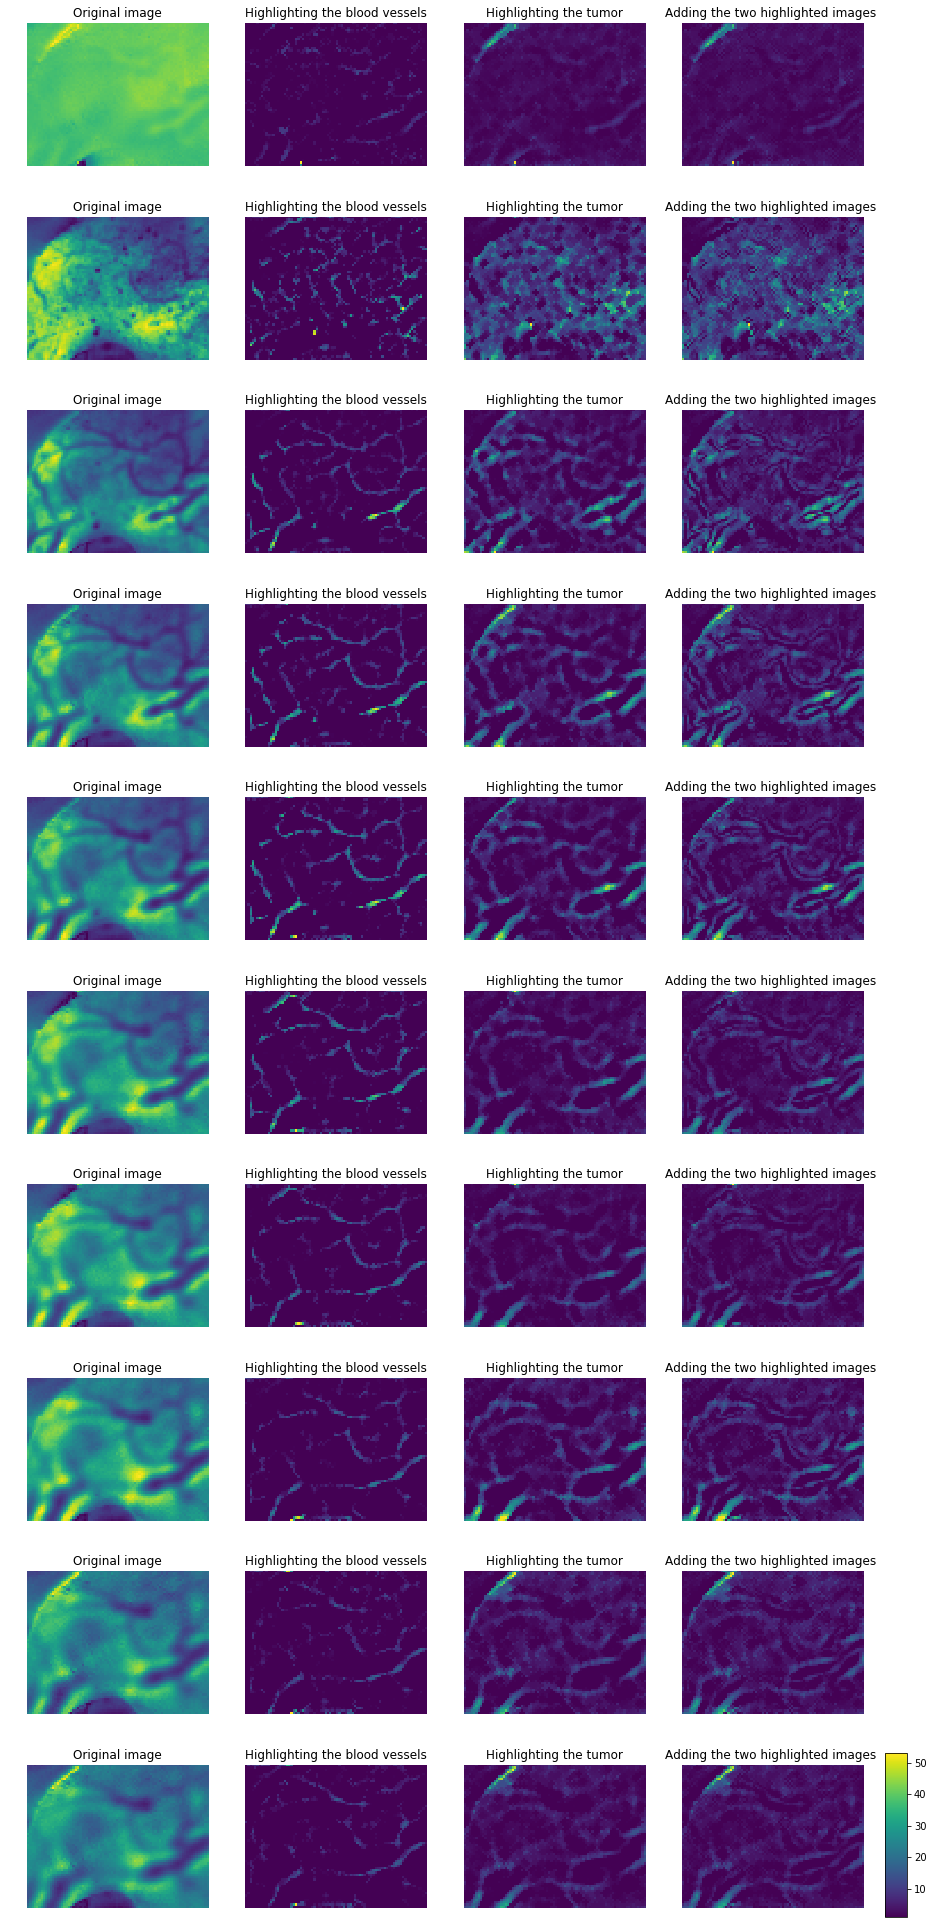

In [27]:
from skimage import io
import skimage.morphology as morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import square, black_tophat, white_tophat
from skimage.color import rgb2gray
from skimage.morphology import erosion
from skimage.morphology import closing
from skimage.morphology import disk

%matplotlib inline 

# convert the image to grayscale image: 

#image_grayscale= rgb2gray(animage)


#define the structuring element (selem):

selem = square (4)
selem2 = disk (1) # Square selem works better


#---------------Implement Top-Hat Filter-----------------
black_transformation  = black_tophat((animage),selem)
white_transformation= white_tophat((animage),selem)
#----------------------------------------------------------
#---------------Implement Erosion Filter-----------------
eroded1= erosion(black_transformation,selem2)
closed2= closing(white_transformation,selem2)
#--------------------------------------------------------

sum2=closed2+eroded1

#Plot the figures
fig, axes = plt.subplots(ncols=4, nrows=10, figsize=(15, 35))
ax = axes.ravel()

i=0
for n in range(10):
    im= ax[i].imshow(np.transpose(animage[:, 64*n+1:64*(n+1)]))#, cmap=plt.cm.gray)
    ax[i].set_title('Original image')


    ax[i+1].imshow(np.transpose(eroded1[:, 64*n+1:64*(n+1)]))#, cmap=plt.cm.gray)
    ax[i+1].set_title('Highlighting the blood vessels')
    
    ax[i+2].imshow(np.transpose(closed2[:, 64*n+1:64*(n+1)]))#, cmap=plt.cm.gray)
    ax[i+2].set_title('Highlighting the tumor')
    
    ax[i+3].imshow(np.transpose(sum2[:, 64*n+1:64*(n+1)]))#, cmap=plt.cm.gray)
    ax[i+3].set_title('Adding the two highlighted images ')
    
    i=i+4

    for a in ax:
        a.axis('off')
  
    
cax = fig.add_axes([0.92, 0.125, 0.02, 0.065]) 
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()



In [28]:
x,yz=np.shape(animage)
y=64
z=yz//y
dim3=np.zeros([x,y,z])
for n in range(z):
    plt.show
    dim3[:,1:64,n]=(animage[:, 64*(n)+1:64*(n+1)])

In [29]:
import time
import numpy as np

from skimage import io

vol = dim3
volume = vol.T
r, c = volume[0].shape
print(vol.shape)
d, r = volume[:,:,0].shape

import plotly.graph_objects as go
nb_frames = d

fig = go.Figure(frames=[go.Frame(data=go.Surface(
    z=(((d-1)/10) - k * 0.1) * np.ones((r, c)),
    surfacecolor=np.flipud(volume[(d-1) - k]),
    #cmin=20, cmax=80
    ),
    name=str(k) # you need to name the frame for the animation to behave properly
    )
    for k in range(nb_frames)])

# Add data to be displayed before animation starts
fig.add_trace(go.Surface(
    z=((d-1)/10) * np.ones((r, c)),
    surfacecolor=np.flipud(volume[d-1]),
    #colorscale='Gray',
   # cmin=20, cmax=80,
    colorbar=dict(thickness=20, ticklen=4)
    ))


def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='Slices in volumetric data',
         width=600,
         height=600,
         scene=dict(
                    zaxis=dict(range=[-0.1, (d/10)], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)

fig.show()

(80, 64, 82)


ModuleNotFoundError: No module named 'plotly.graph_objects'